In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split as tts
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data.csv', sep='|')

In [3]:
data.head()

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,memtest.exe,631ea355665f28d4707448e442fbf5b8,332,224,258,9,0,361984,115712,0,...,4,3.262823,2.568844,3.537939,8797.000000,216,18032,0,16,1
1,ose.exe,9d10f99a6712e28f8acd5641e3a7ea6b,332,224,3330,9,0,130560,19968,0,...,2,4.250461,3.420744,5.080177,837.000000,518,1156,72,18,1
2,setup.exe,4d92f518527353c0db88a70fddcfd390,332,224,3330,9,0,517120,621568,0,...,11,4.426324,2.846449,5.271813,31102.272727,104,270376,72,18,1
3,DW20.EXE,a41e524f8d45f0074fd07805ff0c9b12,332,224,258,9,0,585728,369152,0,...,10,4.364291,2.669314,6.400720,1457.000000,90,4264,72,18,1
4,dwtrig20.exe,c87e561258f2f8650cef999bf643a731,332,224,258,9,0,294912,247296,0,...,2,4.306100,3.421598,5.190603,1074.500000,849,1300,72,18,1


In [4]:
data=data.drop(['Name','md5'],axis=1)

In [5]:
## info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138047 entries, 0 to 138046
Data columns (total 55 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Machine                      138047 non-null  int64  
 1   SizeOfOptionalHeader         138047 non-null  int64  
 2   Characteristics              138047 non-null  int64  
 3   MajorLinkerVersion           138047 non-null  int64  
 4   MinorLinkerVersion           138047 non-null  int64  
 5   SizeOfCode                   138047 non-null  int64  
 6   SizeOfInitializedData        138047 non-null  int64  
 7   SizeOfUninitializedData      138047 non-null  int64  
 8   AddressOfEntryPoint          138047 non-null  int64  
 9   BaseOfCode                   138047 non-null  int64  
 10  BaseOfData                   138047 non-null  int64  
 11  ImageBase                    138047 non-null  float64
 12  SectionAlignment             138047 non-null  int64  
 13 

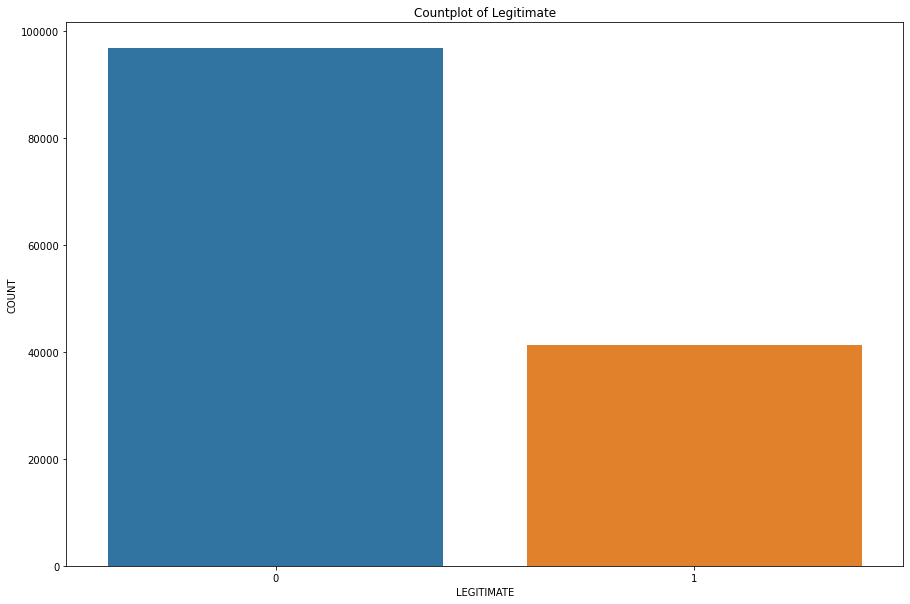

In [6]:
plt.figure(figsize=(15,10))
sns.countplot(x=data['legitimate'])
plt.title('Countplot of Legitimate')
plt.xlabel('LEGITIMATE')
plt.ylabel('COUNT')
plt.savefig('legitimate.jpg')
plt.show()

In [7]:
## total records of the data
data.shape

(138047, 55)

In [8]:
data.describe()

,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
count,138047.000000,138047.000000,138047.000000,138047.000000,138047.000000,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,...,138047.000000,138047.000000,138047.000000,138047.000000,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,138047.000000,138047.000000
mean,4259.069274,225.845632,4444.145994,8.619774,3.819286,2.425956e+05,4.504867e+05,1.009525e+05,1.719561e+05,5.779845e+04,...,22.050700,4.000127,2.434541,5.521610,5.545093e+04,1.818082e+04,2.465903e+05,4.656750e+05,12.363115,0.299340
std,10880.347245,5.121399,8186.782524,4.088757,11.862675,5.754485e+06,2.101599e+07,1.635288e+07,3.430553e+06,5.527658e+06,...,136.494244,1.112981,0.815577,1.597403,7.799163e+06,6.502369e+06,2.124860e+07,2.608987e+07,6.798878,0.457971
min,332.000000,224.000000,2.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,332.000000,224.000000,258.000000,8.000000,0.000000,3.020800e+04,2.457600e+04,0.000000e+00,1.272100e+04,4.096000e+03,...,5.000000,3.458505,2.178748,4.828706,9.560000e+02,4.800000e+01,2.216000e+03,0.000000e+00,13.000000,0.000000
50%,332.000000,224.000000,258.000000,9.000000,0.000000,1.136640e+05,2.631680e+05,0.000000e+00,5.288300e+04,4.096000e+03,...,6.000000,3.729824,2.458492,5.317552,2.708154e+03,4.800000e+01,9.640000e+03,7.200000e+01,15.000000,0.000000
75%,332.000000,224.000000,8226.000000,10.000000,0.000000,1.203200e+05,3.850240e+05,0.000000e+00,6.157800e+04,4.096000e+03,...,13.000000,4.233051,2.696833,6.502239,6.558429e+03,1.320000e+02,2.378000e+04,7.200000e+01,16.000000,1.000000
max,34404.000000,352.000000,49551.000000,255.000000,255.000000,1.818587e+09,4.294966e+09,4.294941e+09,1.074484e+09,2.028711e+09,...,7694.000000,7.999723,7.999723,8.000000,2.415919e+09,2.415919e+09,4.294903e+09,4.294967e+09,26.000000,1.000000


In [9]:
X=data.drop(['legitimate'],axis=1)
y=data['legitimate']

In [10]:
print(X.shape,y.shape)

(138047, 54) (138047,)


In [11]:
print('Researching important feature based on %i total features\n' % X.shape[1])

Researching important feature based on 54 total features



In [12]:
xtrain,xtest,ytrain,ytest=tts(X,y,test_size=0.2,random_state=42,stratify=y)
print(xtrain.shape,ytrain.shape)
print(xtest.shape,ytest.shape)

(110437, 54) (110437,)
(27610, 54) (27610,)


In [13]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.transform(xtest)

Accuracy of the Logistic Regression model is:  98.0043462513582  % !!!
The Classification Report is               precision    recall  f1-score   support

           0       0.98      0.99      0.99     19345
           1       0.97      0.96      0.97      8265

    accuracy                           0.98     27610
   macro avg       0.98      0.97      0.98     27610
weighted avg       0.98      0.98      0.98     27610



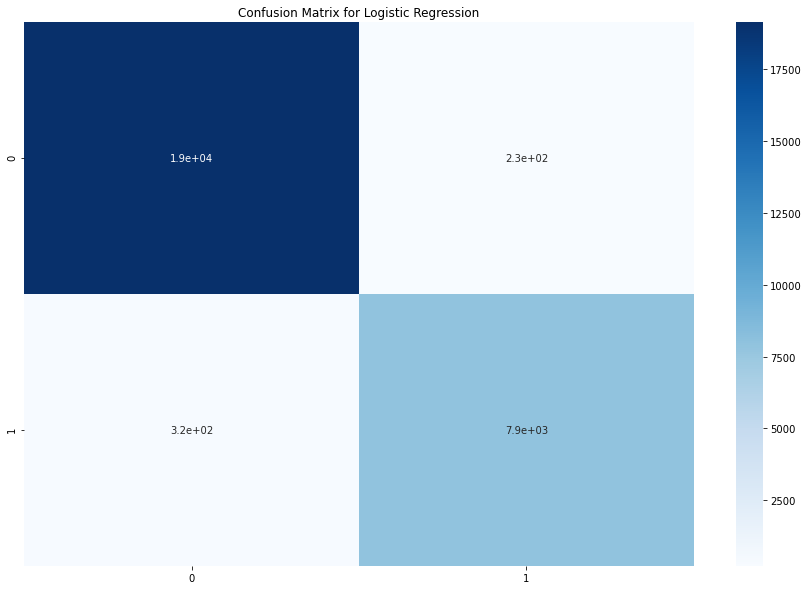

In [14]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
clf0=LogisticRegression(max_iter=300)
clf0.fit(xtrain,ytrain)
ypred=clf0.predict(xtest)
score=[]
score.append(accuracy_score(ytest,ypred))
print("Accuracy of the Logistic Regression model is: ",score[0]*100," % !!!")
print("The Classification Report is",classification_report(ytest,ypred))
cf=confusion_matrix(ytest,ypred)
plt.figure(figsize=(15,10))
sns.heatmap(cf,annot=True,cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.savefig('logosticReg.jpg')
plt.show()

Accuracy of the Decision Tree model is:  99.04744657732707  % !!!
The Classification Report is               precision    recall  f1-score   support

           0       0.99      0.99      0.99     19345
           1       0.99      0.98      0.98      8265

    accuracy                           0.99     27610
   macro avg       0.99      0.99      0.99     27610
weighted avg       0.99      0.99      0.99     27610



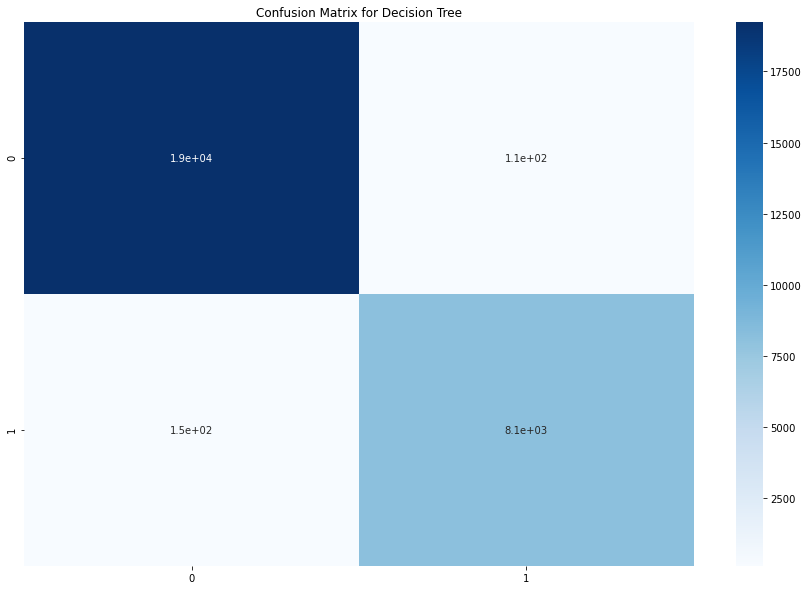

In [15]:
from sklearn.tree import DecisionTreeClassifier
clf1=DecisionTreeClassifier(max_depth=10)
clf1.fit(xtrain,ytrain)
ypred=clf1.predict(xtest)
score.append(accuracy_score(ytest,ypred))
print("Accuracy of the Decision Tree model is: ",score[1]*100," % !!!")
print("The Classification Report is",classification_report(ytest,ypred))
cf=confusion_matrix(ytest,ypred)
plt.figure(figsize=(15,10))
sns.heatmap(cf,annot=True,cmap='Blues')
plt.title('Confusion Matrix for Decision Tree')
plt.savefig('dTree.jpg')
plt.show()

Accuracy of the Random Forest model is:  99.54002173125679  % !!!
The Classification Report is               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19345
           1       0.99      0.99      0.99      8265

    accuracy                           1.00     27610
   macro avg       0.99      0.99      0.99     27610
weighted avg       1.00      1.00      1.00     27610



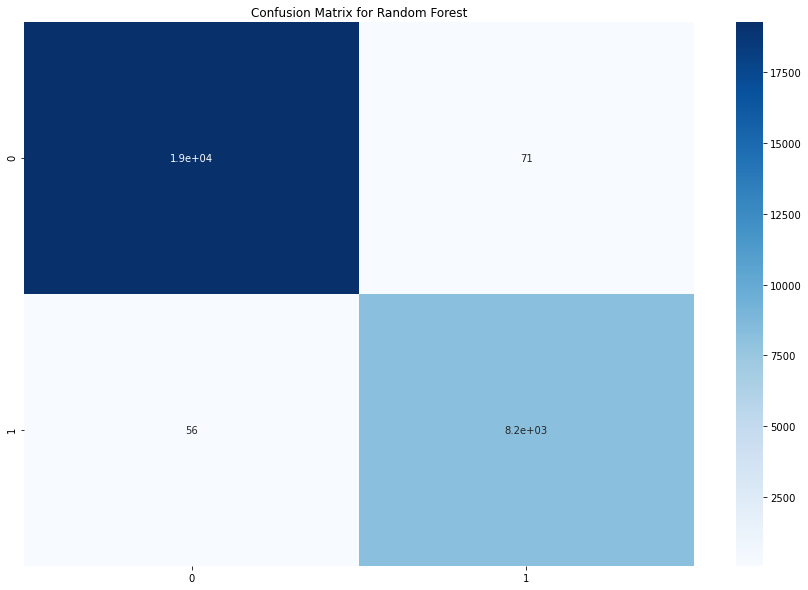

In [16]:
from sklearn.ensemble import RandomForestClassifier
clf2=RandomForestClassifier(n_estimators=50,n_jobs=-1)
clf2.fit(xtrain,ytrain)
ypred=clf2.predict(xtest)
score.append(accuracy_score(ytest,ypred))
print("Accuracy of the Random Forest model is: ",score[2]*100," % !!!")
print("The Classification Report is",classification_report(ytest,ypred))
cf=confusion_matrix(ytest,ypred)
plt.figure(figsize=(15,10))
sns.heatmap(cf,annot=True,cmap='Blues')
plt.title('Confusion Matrix for Random Forest')
plt.savefig('randomForest.jpg')
plt.show()

Accuracy of the MLP Classifier model is:  99.00760593987685  % !!!
The Classification Report is               precision    recall  f1-score   support

           0       0.99      0.99      0.99     19345
           1       0.98      0.98      0.98      8265

    accuracy                           0.99     27610
   macro avg       0.99      0.99      0.99     27610
weighted avg       0.99      0.99      0.99     27610



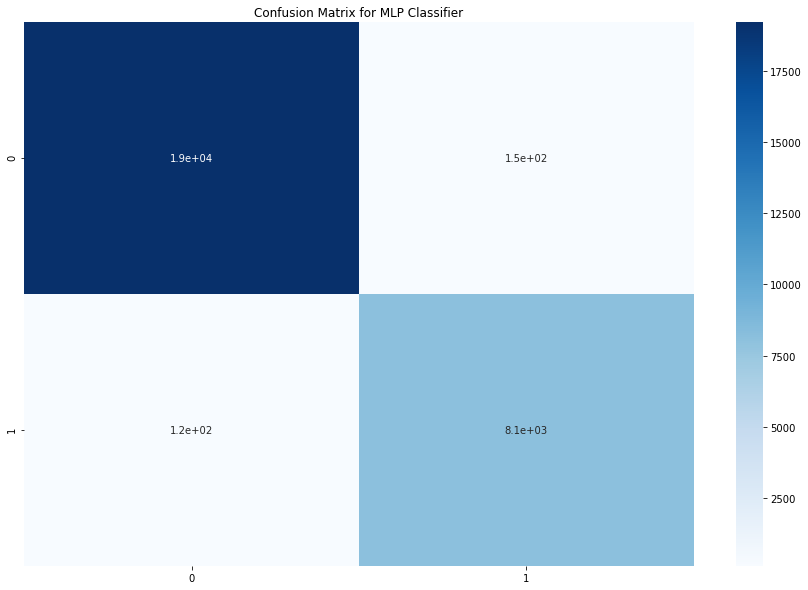

In [17]:
from sklearn.neural_network import MLPClassifier
clf3=MLPClassifier(hidden_layer_sizes=(16,16))
clf3.fit(xtrain,ytrain)
ypred=clf3.predict(xtest)
score.append(accuracy_score(ytest,ypred))
print("Accuracy of the MLP Classifier model is: ",score[3]*100," % !!!")
print("The Classification Report is",classification_report(ytest,ypred))
cf=confusion_matrix(ytest,ypred)
plt.figure(figsize=(15,10))
sns.heatmap(cf,annot=True,cmap='Blues')
plt.title('Confusion Matrix for MLP Classifier')
plt.savefig('MLPClassifier.jpg')
plt.show()

Accuracy of the Gradient Boosting model is:  98.88446215139443  % !!!
The Classification Report is               precision    recall  f1-score   support

           0       0.99      0.99      0.99     19345
           1       0.98      0.98      0.98      8265

    accuracy                           0.99     27610
   macro avg       0.99      0.99      0.99     27610
weighted avg       0.99      0.99      0.99     27610



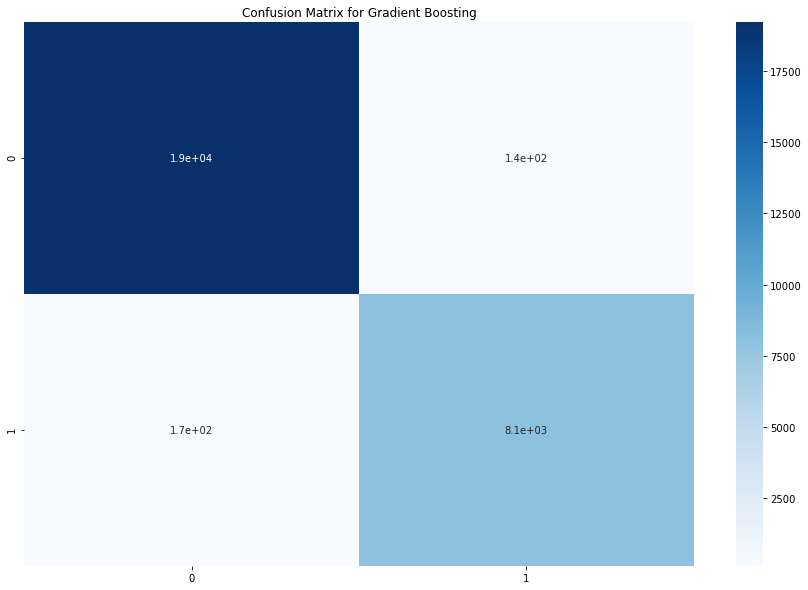

In [18]:
from sklearn.ensemble import GradientBoostingClassifier
clf4=GradientBoostingClassifier(n_estimators=50)
clf4.fit(xtrain,ytrain)
ypred=clf4.predict(xtest)
score.append(accuracy_score(ytest,ypred))
print("Accuracy of the Gradient Boosting model is: ",score[4]*100," % !!!")
print("The Classification Report is",classification_report(ytest,ypred))
cf=confusion_matrix(ytest,ypred)
plt.figure(figsize=(15,10))
sns.heatmap(cf,annot=True,cmap='Blues')
plt.title('Confusion Matrix for Gradient Boosting')
plt.savefig('GradientBoosting.jpg')
plt.show()

In [19]:
import joblib
joblib.dump(sc,'scaler.pkl')
joblib.dump(clf2,'model.pkl')

['model.pkl']